In [16]:
from nd2reader import ND2Reader
import matplotlib.pyplot as plt
%matplotlib inline
import glob
import scipy.misc
import imageio
import numpy as np

In [2]:
# Get all nd2 files
nd2s = glob.glob("raw/*.nd2")
nd2s

['raw/18112019_SJR5_w1_5ms.nd2',
 'raw/18112019_SJR5_w2_30ms.nd2',
 'raw/18112019_SJR5_w3_30ms.nd2',
 'raw/18112019_SJR5_w5_30ms.nd2',
 'raw/18112019_SJR5_w4_30ms.nd2',
 'raw/18112019_SJR5_w2_5ms.nd2',
 'raw/18112019_SJR5_w3_5ms.nd2',
 'raw/18112019_SJR5_w1_30ms.nd2']

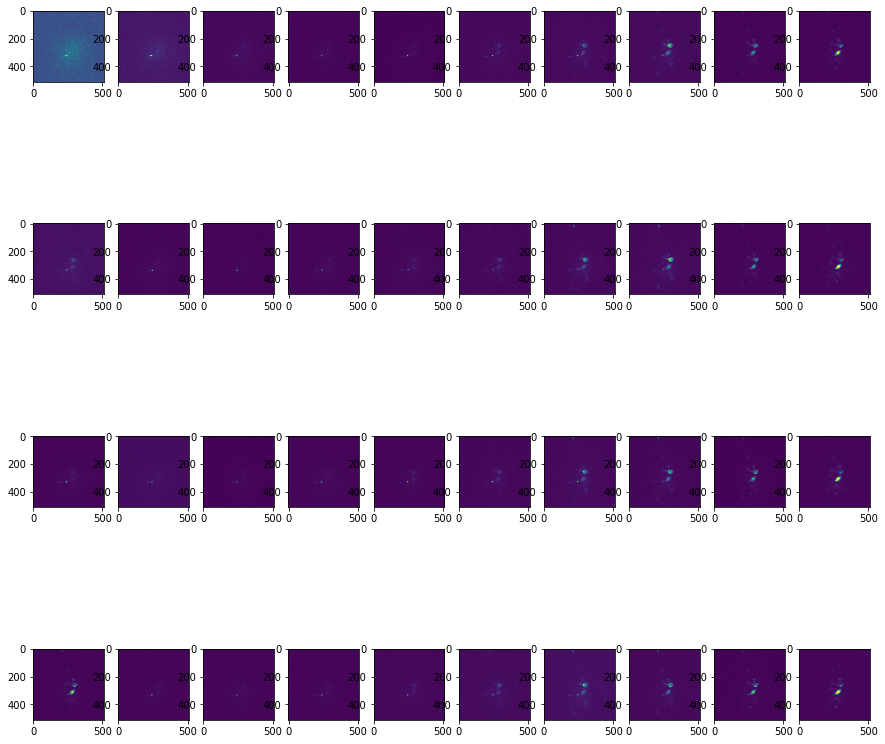

In [3]:
# Plot them
fig, axes = plt.subplots(nrows=4, ncols=10, figsize=(15, 15))

img_index = 0
for nd2 in nd2s:
    with ND2Reader(nd2) as images:
        images.default_coords['c'] = 1
        images.bundle_axes = 'yxz'
        for volumeIndex in range(len(images)):
            crtImage = images[volumeIndex]
            slices = crtImage.shape[2]
            for sliceIndex in range(slices):
                if sliceIndex == 10:
                    break
                axes[img_index * 4 + volumeIndex, sliceIndex].imshow(crtImage[:,:,sliceIndex])
        break
    img_index += 1


In [4]:
# Convert nd2 to pngs
img_index = 0
for nd2 in nd2s:
    fileName = nd2.split('/')[-1].split('.nd2')[0]
    with ND2Reader(nd2) as images:
        for i in range(len(images)):
            name = "processed/" + fileName + "-" + str(i) + ".jpg"
            imageio.imwrite(name, images[i])
    img_index += 1
    

Lossy conversion from float64 to uint8. Range [80.0, 134.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [82.0, 337.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [79.0, 320.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [69.0, 247.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [78.0, 139.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [80.0, 138.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [79.0, 138.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [82.0, 136.0]. Convert image to uint8 prior to saving to suppress this w

In [6]:
# Convert nd2 to pngs
for nd2 in nd2s:
    with ND2Reader(nd2) as images:
        fileName = nd2.split('/')[-1].split('.nd2')[0]
        images.default_coords['c'] = 1
        images.bundle_axes = 'yxz'
        for volumeIndex in range(len(images)):
            crtImage = images[volumeIndex]
            slices = crtImage.shape[2]
            for sliceIndex in range(slices):
                name = "processed/" + fileName + "-v" + str(volumeIndex) + "-s" + str(sliceIndex) + ".jpg"
                imageio.imwrite(name, crtImage[:,:,sliceIndex])
        break
    img_index += 1
    


Lossy conversion from float64 to uint8. Range [40.0, 684.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 612.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [53.0, 539.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [25.0, 493.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [56.0, 653.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [63.0, 482.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [51.0, 256.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [60.0, 230.0]. Convert image to uint8 prior to saving to suppress this wa

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3296, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-6-a9104be20b3a>", line 12, in <module>
    imageio.imwrite(name, crtImage[:,:,sliceIndex])
  File "/usr/local/lib/python3.7/site-packages/imageio/core/functions.py", line 261, in imwrite
    writer.append_data(im)
  File "/usr/local/lib/python3.7/site-packages/imageio/core/format.py", line 492, in append_data
    return self._append_data(im, total_meta)
  File "/usr/local/lib/python3.7/site-packages/imageio/plugins/pillow.py", line 496, in _append_data
    PillowFormat.Writer._append_data(self, im, meta)
  File "/usr/local/lib/python3.7/site-packages/imageio/plugins/pillow.py", line 217, in _append_data
    img.save(self._fp, format=self.format.plugin_id, **self._meta)
  File "/usr/local/lib/python3.7/site-packages/PIL/Image.py", line 1994, in save
    save_handler(self, f

KeyboardInterrupt: 

In [20]:
imgIndex = 0
for nd2 in nd2s:
    with ND2Reader(nd2) as images:
        fileName = nd2.split('/')[-1].split('.nd2')[0]
        images.default_coords['c'] = 1
        images.bundle_axes = 'yxz'
        
        for volumePair in [(0, 2), (1, 3)]:
            imageA = images[volumePair[0]]
            imageB = images[volumePair[1]]
            
            
            slices = crtImage.shape[2]
            for sliceIndex in range(slices):
               nameA = "processed/a/" + str(imgIndex) + "-v" + str(volumePair[0]) + "-s" + str(sliceIndex) + ".jpg"
               imageio.imwrite(nameA, imageA[:,:,sliceIndex].astype(np.uint8))
                
               nameB = "processed/b/" + str(imgIndex) + "-v" + str(volumePair[1]) + "-s" + str(sliceIndex) + ".jpg"
               imageio.imwrite(nameB, imageB[:,:,sliceIndex].astype(np.uint8))
                
               imgIndex += 1
   
print("Done")

Done
